## Meta Models vs Final Prediction RMSE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_rmse(actual, predicted):
    return np.sqrt(((actual - predicted) ** 2).mean())

def compute_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

In [3]:
# Define the data file
IS_FILTERED = True
ARCHIVED = None
SHOW_LAST_APPEARANCE = 30

# Load data
datafile = "prediction_result_filtered.csv" if IS_FILTERED else "prediction_result.csv"
dir = "../source/"

In [4]:
def load_data(layer: str):
    dir = (
        "../source/" + layer + "_prediction_dataset/" + datafile
        if ARCHIVED is None
        else "../source/"
        + layer
        + "_prediction_dataset/archive/"
        + str(ARCHIVED)
        + "/"
        + datafile
    )
    df = pd.read_csv(dir)
    df["Time"] = pd.to_datetime(df["Time"])
    df["FormattedTime"] = df["Time"].dt.strftime("%H:%M:%S")
    df = df.sort_values(by="FormattedTime")
    df = df.set_index("FormattedTime")
    return df

In [5]:
df_meta = load_data("l2")
df_final = load_data("l3")

# Reduce size of appearance (SHOW_LAST_APPEARANCE)
if SHOW_LAST_APPEARANCE is not None:
    df_meta = df_meta.tail(SHOW_LAST_APPEARANCE)
    df_final = df_final.tail(SHOW_LAST_APPEARANCE)

target_cols = ['LINEAR_REGRESSION', 'RANDOM_FOREST', 'FEEDFORWARD_NEURAL_NETWORK', 'Predicted']

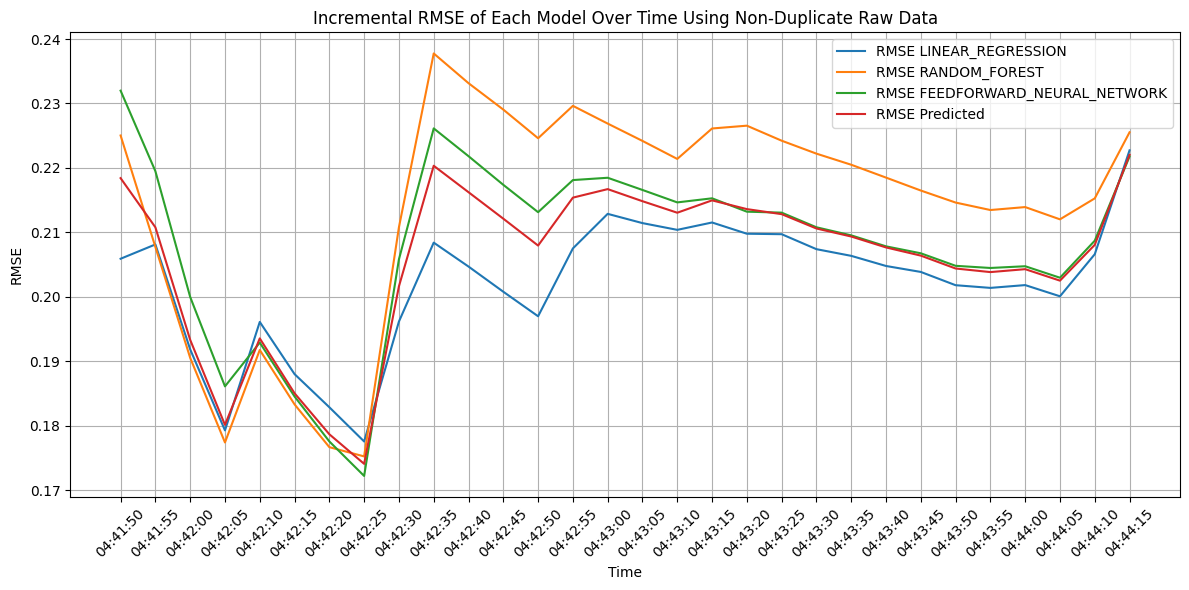

Final RMSE LINEAR_REGRESSION: 0.2227306736774736
Final RMSE RANDOM_FOREST: 0.22553346677038436
Final RMSE FEEDFORWARD_NEURAL_NETWORK: 0.22177863639966858
Final RMSE Predicted: 0.22203522608269796


In [6]:
# Concatenating the DataFrames without renaming 'Raw' since it's the same in both
combined_df_simple = pd.concat([df_meta, df_final], axis=1)

# Dropping duplicate 'Raw' and 'Actual' columns from the combined DataFrame
combined_df_no_duplicates = combined_df_simple.loc[:,~combined_df_simple.columns.duplicated()]

# Recalculating incremental RMSE using the non-duplicate 'Raw' column
rmse_over_time_no_duplicates = pd.DataFrame(index=combined_df_no_duplicates.index, columns=target_cols)

# Compute RMSE incrementally for each time point
for time_point in combined_df_no_duplicates.index:
    for col in target_cols:
        # Calculate RMSE from start to the current time point
        rmse_over_time_no_duplicates.at[time_point, col] = np.sqrt(
            compute_rmse(combined_df_no_duplicates.loc[:time_point, 'Raw'], combined_df_no_duplicates.loc[:time_point, col])
        )

# Convert RMSE values to numeric for plotting
rmse_over_time_no_duplicates = rmse_over_time_no_duplicates.apply(pd.to_numeric)

# Plotting incremental RMSE over time
plt.figure(figsize=(12, 6))
for col in rmse_over_time_no_duplicates.columns:
    plt.plot(rmse_over_time_no_duplicates.index, rmse_over_time_no_duplicates[col], label=f'RMSE {col}')

plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Incremental RMSE of Each Model Over Time Using Non-Duplicate Raw Data')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the dates for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()

# Calculating the final RMSE of each model for the entire dataset
final_rmse_values = {}
for col in target_cols:
    final_rmse_values[col] = np.sqrt(
        compute_rmse(combined_df_no_duplicates['Raw'], combined_df_no_duplicates[col])
    )

# Displaying the final RMSE values for each model
for key, value in final_rmse_values.items():
    print(f'Final RMSE {key}: {value}')

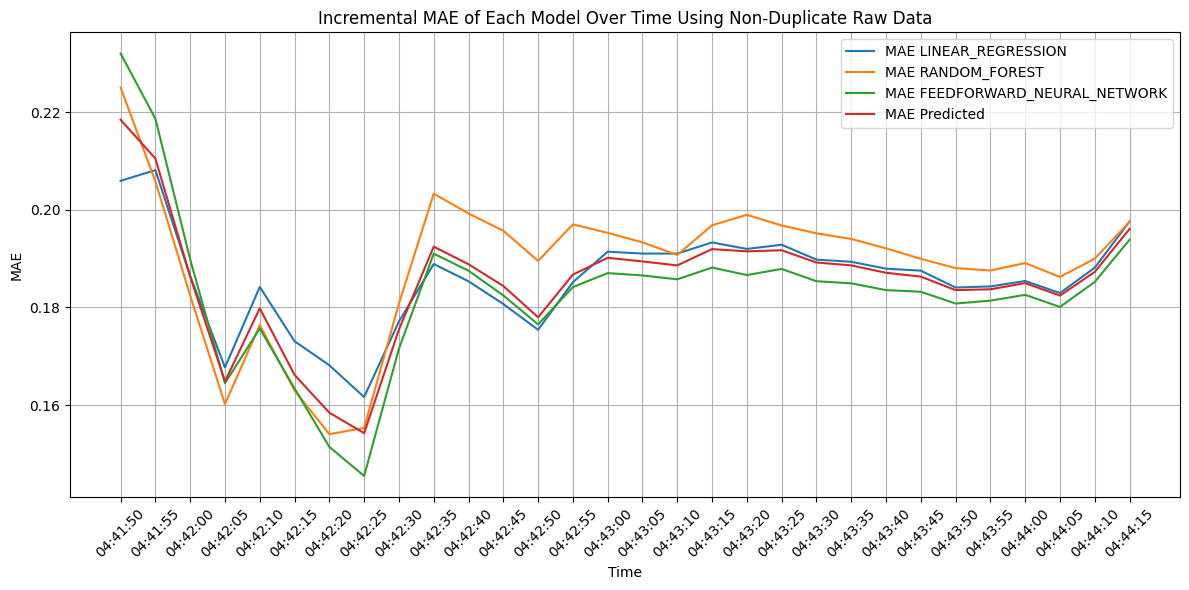

Final MAE LINEAR_REGRESSION: 0.19758203318364329
Final MAE RANDOM_FOREST: 0.19752164438359657
Final MAE FEEDFORWARD_NEURAL_NETWORK: 0.193840400784225
Final MAE Predicted: 0.19605185379310808


In [7]:
# Concatenating the DataFrames without renaming 'Raw' since it's the same in both
combined_df_simple = pd.concat([df_meta, df_final], axis=1)

# Dropping duplicate 'Raw' and 'Actual' columns from the combined DataFrame
combined_df_no_duplicates = combined_df_simple.loc[:,~combined_df_simple.columns.duplicated()]

# Recalculating incremental MAE using the non-duplicate 'Raw' column
mae_over_time_no_duplicates = pd.DataFrame(index=combined_df_no_duplicates.index, columns=target_cols)

# Compute MAE incrementally for each time point
for time_point in combined_df_no_duplicates.index:
    for col in target_cols:
        # Calculate MAE from start to the current time point
        mae_over_time_no_duplicates.at[time_point, col] = np.sqrt(
            compute_mae(combined_df_no_duplicates.loc[:time_point, 'Raw'], combined_df_no_duplicates.loc[:time_point, col])
        )

# Convert MAE values to numeric for plotting
mae_over_time_no_duplicates = mae_over_time_no_duplicates.apply(pd.to_numeric)

# Plotting incremental MAE over time
plt.figure(figsize=(12, 6))
for col in mae_over_time_no_duplicates.columns:
    plt.plot(mae_over_time_no_duplicates.index, mae_over_time_no_duplicates[col], label=f'MAE {col}')

plt.xlabel('Time')
plt.ylabel('MAE')
plt.title('Incremental MAE of Each Model Over Time Using Non-Duplicate Raw Data')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the dates for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()

# Calculating the final MAE of each model for the entire dataset
final_mae_values = {}
for col in target_cols:
    final_mae_values[col] = np.sqrt(
        compute_mae(combined_df_no_duplicates['Raw'], combined_df_no_duplicates[col])
    )

# Displaying the final MAE values for each model
for key, value in final_mae_values.items():
    print(f'Final MAE {key}: {value}')